## TP2 : K-plus proches voisins, analyse discriminante linéaire et régresion logistique - MDI343

## By Davide Garcia Civiero - MS IA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tp_knn_source as tp

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 1) Etude des fonctions

#### - rand_bi_gauss

Renvoit des points générés (observations x, labels y) suivant deux lois gaussiennes centrées en mu1 et mu2, avec écart-type sigma1 et sigla2 respectivement.
La dernière colonne correspond aux labels y associés aux observations x. <br>
On a donc deux labels {-1, 1}

In [2]:
# Génération du dataset bi_gauss
X_1, y_1 = tp.rand_bi_gauss(n1=20, n2=20, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9],
                  sigmas2=[0.9, 0.9])

#### - rand_tri_gauss

Renvoit les mêmes outputs que rand_bi_gauss mais générés suivant trois lois guassiennes de paramètres mu1, mu2, mu2 et respectivement sigma1, sigma2, sigma3. <br>
On a donc 3 labels différents {1, 2, 3}

In [3]:
# Génération du dataset bi_gauss
X_2, y_2 = tp.rand_tri_gauss(n1=50, n2=50, n3 = 50, mu1=[1, 1], mu2=[-1, -1], mu3=[1, -1], sigma1=[0.9, 0.9],
                  sigma2=[0.9, 0.9], sigma3=[0.9, 0.9])

#### - rand_clown

Renvoit des points générés aléatoirement avec des bruits d'écart-types sigma1 et sigma2. <br>
On a donc deux labels différents {-1, 1}.

In [4]:
# Génération du dataset clown
X_3, y_3 = tp.rand_clown(n1=50, n2=50, sigma1 = 1, sigma2 = 5)

#### - rand_checkers

Renvoit des points générés aléatoirement avec un noisy checker de paramètre sigma. <br>
Il y a 3 labels différents {1, 2, 3}.

In [5]:
# Génération du dataset checkers
X_4, y_4 = tp.rand_checkers(n1=150, n2=150, sigma = 0.1)

### 2) Plot des jeux de données

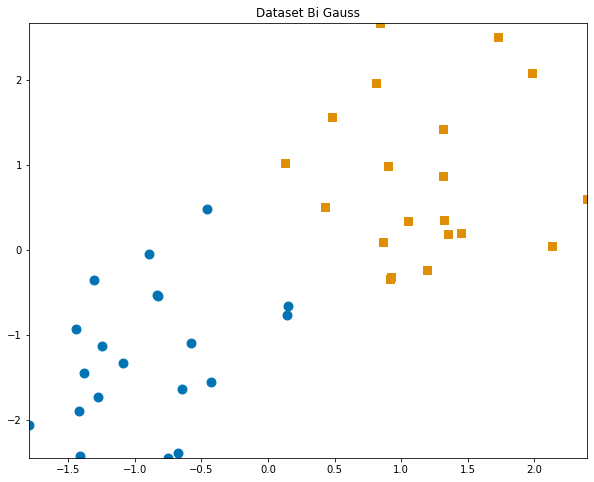

In [6]:
plt.figure(figsize=(10,8))
tp.plot_2d(X_1, y_1, alpha_choice = 1)
plt.title('Dataset Bi Gauss')
plt.show()

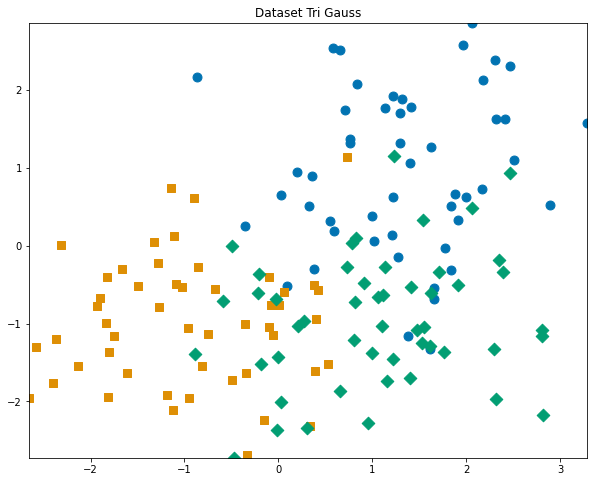

In [7]:
plt.figure(figsize=(10,8))
tp.plot_2d(X_2, y_2, alpha_choice = 1)
plt.title('Dataset Tri Gauss')
plt.show()

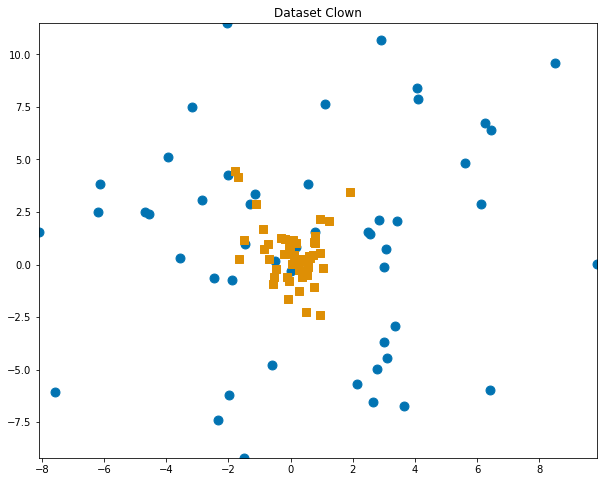

In [8]:
plt.figure(figsize=(10,8))
tp.plot_2d(X_3, y_3, alpha_choice = 1)
plt.title('Dataset Clown')
plt.show()

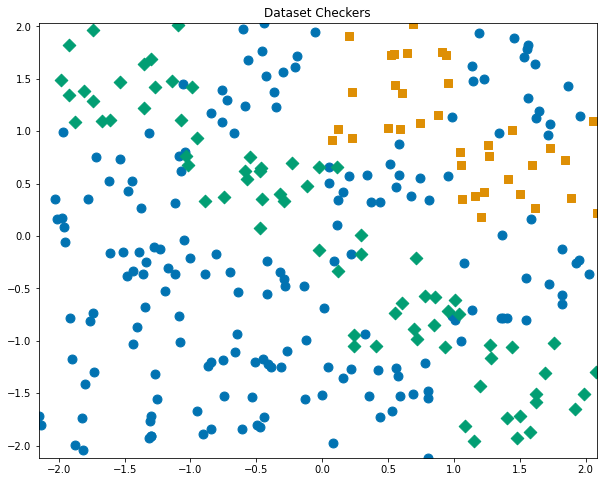

In [9]:
plt.figure(figsize=(10,8))
tp.plot_2d(X_4, y_4, alpha_choice = 1)
plt.title('Dataset Checkers')
plt.show()

### 3) Version adaptée de K-Nearest Neighbours pour la régression.

La méthode de KNN permet de prédire un point selon le label de ses plus proches voisins. <br>
Dans le cadre de la régression où l'ensemble des labels est l'ensemble $\mathbb{R}$, on peut adapter cette méthode en faisant une moyenne des labels des plus proches voisins de x: <br>
On note x : le point à classifier et $\hat{y}=\frac{1}{k} \sum_{i=1}^{n} y_{i}$ la moyenne <br>
avec l'indice k étant le nombre des plus proches voisins du point x. Ainsi, on fait la moyenne sur tous les y_i (les labels des plus proches voisins de x). <br>
Cela permet d'approximer le label du point x.

### 4) Ecriture de la classe KNN 

In [10]:
X_train = [X_2[i] for i in range(len(X_2)) if i%2 == 0]
y_train = [y_2[i] for i in range(len(y_2)) if i%2 == 0]

X_test = [X_2[i] for i in range(len(X_2)) if i%2 == 1]
y_test = [y_2[i] for i in range(len(y_2)) if i%2 == 1]

In [11]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter

class KNNClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        
    
    # Méthode permettant d'entraîner le modèle
    def fit(self, X, y):
        # On garde juste le dataset en mémoire
        self.X_train = X
        self.y_train = y
        
  
    # Méthode permettant de prédire valeurs après "fit"
    def predict(self, X):
        
        label_pred = [self._pred_(x) for x in X]
        
        return np.array(label_pred)
    
    def _pred_(self, X):
        # Calculer distance entre point et les autres x
        distance = [np.sqrt(np.sum((X - x_train) ** 2)) for x_train in self.X_train]
        
        # Sort l'array du plus petit au plus grand
        sorted_index = np.argsort(distance)
        
        # Garder les éléments KNN
        knn_array = sorted_index[:self.n_neighbors]
        
        # Garder les index des plus proches voisins
        index_knn = [self.y_train[index] for index in knn_array]
        
        # Faire un "majority vote" pour récupérer la classe la plus représentée
        major_label = Counter(index_knn).most_common(1)
        
        return major_label[0][0]

#### Test pour K=1

In [12]:
classifier = KNNClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

count = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        count +=1 
print("Pour k=1, le taux de précision est de: {} %".format(count / len(y_pred) * 100))

Pour k=1, le taux de précision est de: 62.66666666666667 %


#### Test pour k = 8 

In [13]:
classifier = KNNClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

count = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        count +=1
print("Pour k=1, le taux de précision est de: {} %".format(count / len(y_pred) * 100))

Pour k=1, le taux de précision est de: 68.0 %


### 5) Tests sur les quatre jeux de données

In [14]:
# Fonction pour calculer la précision des prédictions
def accuracy(y_pred, y_test):
    count = 0
    n = len(y_pred)
    for i in range(n):
        if y_pred[i] == y_test[i]:
            count += 1
    return count / n

In [15]:
# Fonction pour frontiere_new
def f(X):
    return knn.predict(X.reshape(1,-1))

#### Pour Dataset 1 "Bi Gauss"

In [16]:
X_train1 = np.array([X_1[i] for i in range(len(X_1)) if i%2 == 0])
y_train1 = np.array([y_1[i] for i in range(len(y_1)) if i%2 == 0])

X_test1 = np.array([X_1[i] for i in range(len(X_1)) if i%2 == 1])
y_test1 = np.array([y_1[i] for i in range(len(y_1)) if i%2 == 1])

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1, y_train1)
y_pred1 = knn.predict(X_test1)

acc1 = accuracy(y_pred1, y_test1)
print("Pour k=5, le taux de précision est de: {} %".format(acc1 * 100))

Pour k=5, le taux de précision est de: 90.0 %


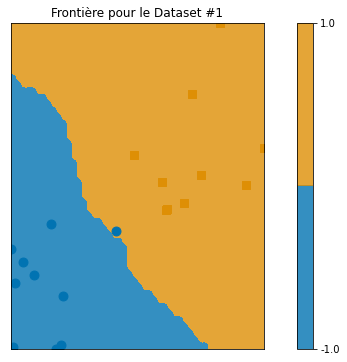

In [18]:
def f(X):
    return knn.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train1, y_train1)
plt.title("Frontière pour le Dataset #1")
plt.show()

#### Pour Dataset 2 "Tri gauss"

In [19]:
X_train2 = np.array([X_2[i] for i in range(len(X_2)) if i%2 == 0])
y_train2 = np.array([y_2[i] for i in range(len(y_2)) if i%2 == 0])

X_test2 = np.array([X_2[i] for i in range(len(X_2)) if i%2 == 1])
y_test2 = np.array([y_2[i] for i in range(len(y_2)) if i%2 == 1])

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train2)
y_pred2 = knn.predict(X_test2)

acc2 = accuracy(y_pred2, y_test2)
print("Pour k=5, le taux de précision est de: {} %".format(acc2 * 100))

Pour k=5, le taux de précision est de: 72.0 %


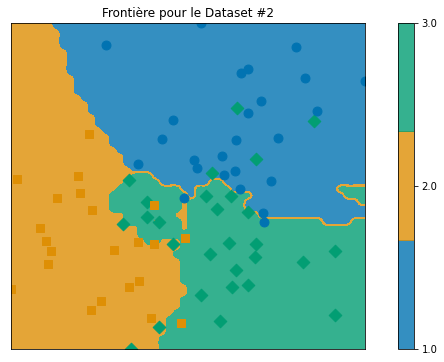

In [21]:
def f(X):
    return knn.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train2, y_train2)
plt.title("Frontière pour le Dataset #2")
plt.show()

#### Pour Dataset 3 "Clown"

In [22]:
X_train3 = np.array([X_3[i] for i in range(len(X_3)) if i%2 == 0])
y_train3 = np.array([y_3[i] for i in range(len(y_3)) if i%2 == 0])

X_test3 = np.array([X_3[i] for i in range(len(X_3)) if i%2 == 1])
y_test3 = np.array([y_3[i] for i in range(len(y_3)) if i%2 == 1])

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train3, y_train3)
y_pred3 = knn.predict(X_test3)

acc3 = accuracy(y_pred3, y_test3)
print("Pour k=5, le taux de précision est de: {} %".format(acc3 * 100))

Pour k=5, le taux de précision est de: 84.0 %


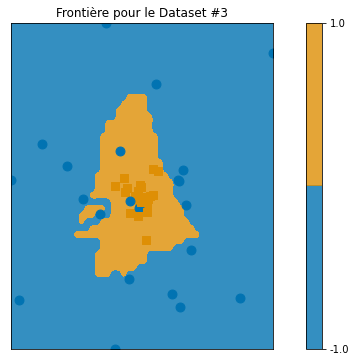

In [24]:
def f(X):
    return knn.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train3, y_train3)
plt.title("Frontière pour le Dataset #3")
plt.show()

#### Pour Dataset 4 "Checkers"

In [25]:
X_train4 = np.array([X_4[i] for i in range(len(X_4)) if i%2 == 0])
y_train4 = np.array([y_4[i] for i in range(len(y_4)) if i%2 == 0])

X_test4 = np.array([X_4[i] for i in range(len(X_4)) if i%2 == 1])
y_test4 = np.array([y_4[i] for i in range(len(y_4)) if i%2 == 1])

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train4, y_train4)
y_pred4 = knn.predict(X_test4)

acc4 = accuracy(y_pred4, y_test4)
print("Pour k=5, le taux de précision est de: {} %".format(acc4 * 100))

Pour k=5, le taux de précision est de: 80.55555555555556 %


Text(0.5, 1.0, 'Frontière pour le Dataset #4')

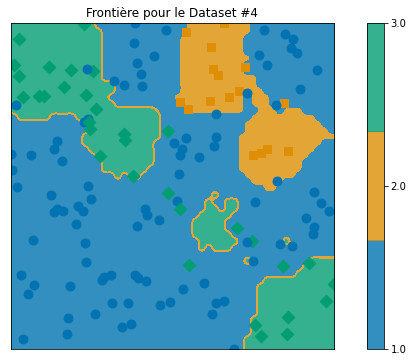

In [27]:
def f(X):
    return knn.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train4, y_train4)
plt.title("Frontière pour le Dataset #4")

### 6) Variation du nombre k des plus proches voisins pour le jeu de données #2

In [28]:
list_acc = list()

for k in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2)
    y_pred_k = knn.predict(X_test2)
    list_acc.append(accuracy(y_pred_k, y_test2))

Text(0.5, 1.0, "Evolution de la précision en fonction du nombre de voisins 'K'")

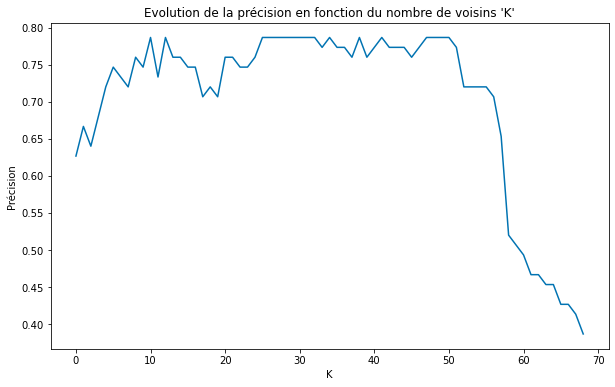

In [29]:
plt.figure(figsize=(10,6))
plt.plot(list_acc)
plt.xlabel('K')
plt.ylabel('Précision')
plt.title("Evolution de la précision en fonction du nombre de voisins 'K'")

Commentaires :  <br>

Lorsque k=1, la précision du modèle reste assez faible (environ 0.73 dans le cas du dataset 2). De plus, cela signifie que l'on prend qu'un seul voisin pour la classification et on a donc un risque de surapprentissage. <br>
Dans le cas contraire lorsque k = n (donc k très grand), on effectue un vote de majorité sur tous les points du dataset, on fait toujours la même prédiction. Ainsi, comme on l'observe sur le graphe ci-dessus, la précision décroit fortement (on est aux alentours de 0.5 pour k=70).

#### Frontière pour k = 65 (grand)

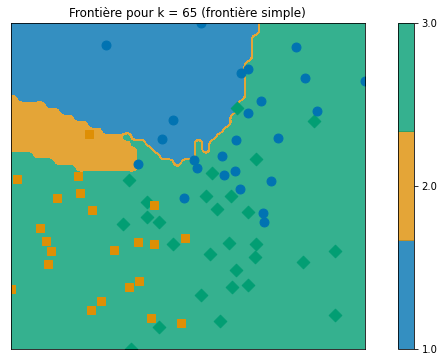

In [30]:
knn = KNeighborsClassifier(n_neighbors=65)
knn.fit(X_train2, y_train2)
y_pred_2 = knn.predict(X_test2)

def f(X):
    return knn.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train2, y_train2)
plt.title("Frontière pour k = 65 (frontière simple)")
plt.show()

#### Frontière pour k = 1 (petit)

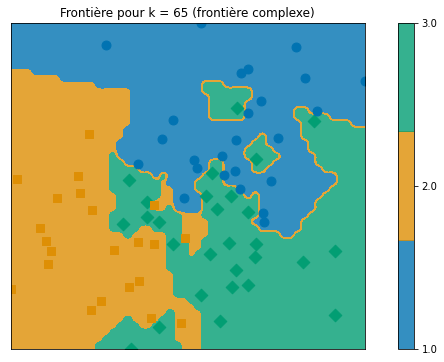

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train2, y_train2)
y_pred_2 = knn.predict(X_test2)

def f(X):
    return knn.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train2, y_train2)
plt.title("Frontière pour k = 65 (frontière complexe)")
plt.show()

Ainis la frontière semble simple dans les cas où k=n (grand). <br>
Contrairement, la frontière est complexe lorsque k est trop bas et se rapproche de 1, donc quand il y a surapprentissage.

### 7) Implémentation du KNN avec poids

#### j = -2

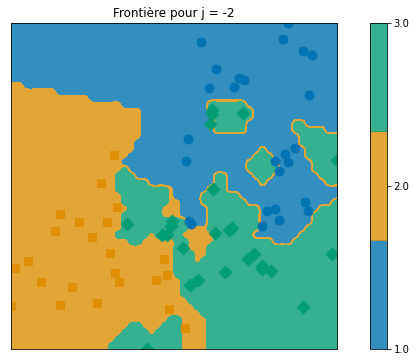

Le taux d'erreur pour j=-2 est de 37.33333333333333%


In [32]:
# Définition de la fonction de poids
def weight_func_m2(dist):
    j = -2
    h = 10 ** j
    return np.exp(-dist**2 / h)

# Application du KNN 
knn_w_m2 = KNeighborsClassifier(n_neighbors=7, weights=weight_func_m2)
knn_w_m2.fit(X_train2, y_train2)
y_pred_m2 = knn_w_m2.predict(X_test2)
acc = accuracy(y_pred_m2, y_test2)

# Fonction pour frontiere_new
def f(X):
    return knn_w_m2.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_test2, y_pred_m2)
plt.title("Frontière pour j = -2")
plt.show()
print("Le taux d'erreur pour j=-2 est de {}%".format((1-acc)*100))

#### j = -1

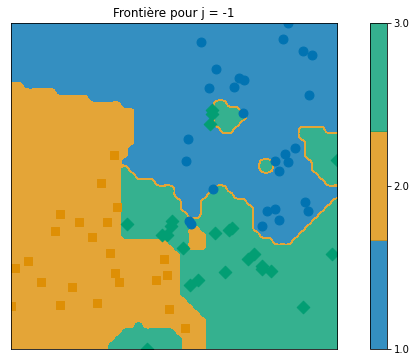

Le taux d'erreur pour j=-1 est de 37.33333333333333%


In [33]:
# Définition de la fonction de poids
def weight_func_m1(dist):
    j = -1
    h = 10 ** j
    return np.exp(-dist**2 / h)

# Application du KNN 
knn_w_m1 = KNeighborsClassifier(n_neighbors=7, p = 2, weights=weight_func_m1)
knn_w_m1.fit(X_train2, y_train2)
y_pred_m1 = knn_w_m1.predict(X_test2)
acc = accuracy(y_pred_m1, y_test2)

# Fonction pour frontiere_new
def f(X):
    return knn_w_m1.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_test2, y_pred_m1)
plt.title("Frontière pour j = -1")
plt.show()

print("Le taux d'erreur pour j=-1 est de {}%".format((1-acc)*100))

#### j = 0

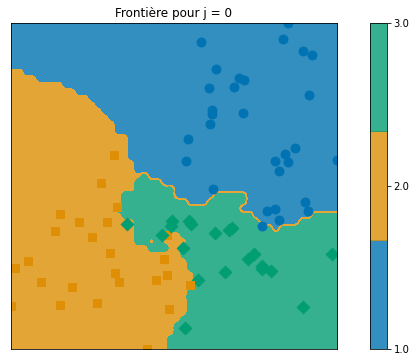

Le taux d'erreur pour j=0 est de 28.000000000000004%


In [34]:
# Définition de la fonction de poids
def weight_func_0(dist):
    j = 0
    h = 10 ** j
    return np.exp(-dist**2 / h)

# Application du KNN 
knn_w_0 = KNeighborsClassifier(n_neighbors=7, p = 2, weights=weight_func_0)
knn_w_0.fit(X_train2, y_train2)
y_pred_0 = knn_w_0.predict(X_test2)
acc = accuracy(y_pred_0, y_test2)

# Fonction pour frontiere_new
def f(X):
    return knn_w_0.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_test2, y_pred_0)
plt.title("Frontière pour j = 0")
plt.show()

print("Le taux d'erreur pour j=0 est de {}%".format((1-acc)*100))

#### j = 1

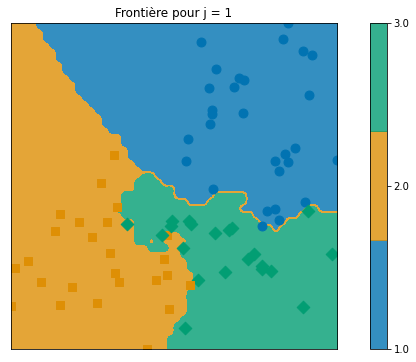

Le taux d'erreur pour j=1 est de 26.66666666666667%


In [35]:
# Définition de la fonction de poids
def weight_func_1(dist):
    j = 1
    h = 10 ** j
    return np.exp(-dist**2 / h)

# Application du KNN 
knn_w_1 = KNeighborsClassifier(n_neighbors=7, p = 2, weights=weight_func_1)
knn_w_1.fit(X_train2, y_train2)
y_pred_1 = knn_w_1.predict(X_test2)
acc = accuracy(y_pred_1, y_test2)

# Fonction pour frontiere_new
def f(X):
    return knn_w_1.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_test2, y_pred_1)
plt.title("Frontière pour j = 1")
plt.show()

print("Le taux d'erreur pour j=1 est de {}%".format((1-acc)*100))

#### j= 2

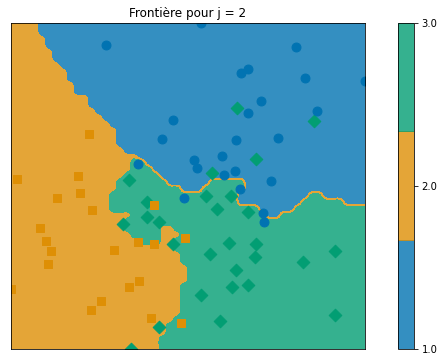

Le taux d'erreur pour j=2 est de 26.66666666666667%


In [36]:
# Définition de la fonction de poids
def weight_func_2(dist):
    j = 2
    h = 10 ** j
    return np.exp(-dist**2 / h)

# Application du KNN 
knn_w_2 = KNeighborsClassifier(n_neighbors=7, p = 2, weights=weight_func_2)
knn_w_2.fit(X_train2, y_train2)
y_pred_2 = knn_w_2.predict(X_test2)
acc = accuracy(y_pred_2, y_test2)

def f(X):
    return knn_w_2.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train2, y_train2)
plt.title("Frontière pour j = 2")
plt.show()

print("Le taux d'erreur pour j=2 est de {}%".format((1-acc)*100))

Lorsque j devient grand, la frontière de décision devient plus "lisse".

### 8) Taux d'erreur pour k=1

#### Sur le jeu d'apprentissage

In [37]:
knn_app = KNeighborsClassifier(n_neighbors=1)
knn_app.fit(X_train2, y_train2)
y_pred_app = knn_app.predict(X_train2)

acc_app = accuracy(y_pred_app, y_train2)
print("Le taux d'erreur sur le jeu d'apprentissage est de {} %".format((1 - acc_app) * 100))

Le taux d'erreur sur le jeu d'apprentissage est de 0.0 %


#### Sur le jeu de test

In [38]:
y_pred_test = knn_app.predict(X_test2)

acc_test = accuracy(y_pred_test, y_test2)
print("Le taux d'erreur sur le jeu d'apprentissage est de {} %".format((1 - acc_test) * 100))

Le taux d'erreur sur le jeu d'apprentissage est de 37.33333333333333 %


### 9) Taux d'erreur pour le dataset 4

In [39]:
error_list = list()

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train4, y_train4)
    y_pred = knn.predict(X_test4)
    error_list.append((1 -accuracy(y_pred, y_test4)) * 100)
min_k = error_list.index(min(error_list))

Text(0, 0.5, 'Erreur (%)')

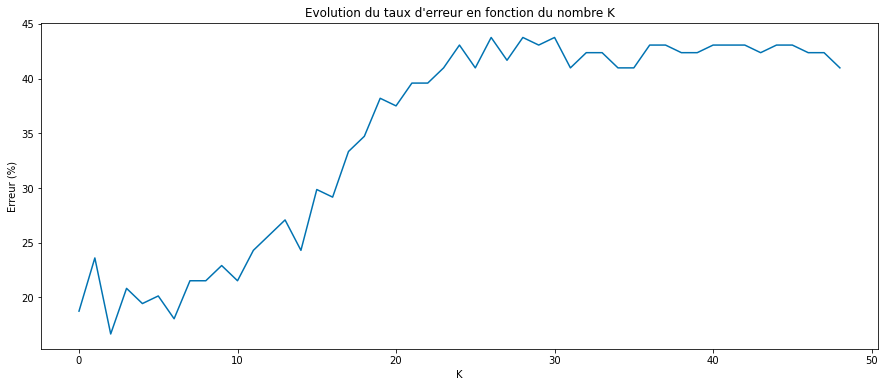

In [40]:
plt.figure(figsize=(15,6))
plt.plot(error_list)
plt.title("Evolution du taux d'erreur en fonction du nombre K")
plt.xlabel("K")
plt.ylabel("Erreur (%)")

In [41]:
print("Le taux d'erreur est minimal pour K = {} , soit un taux de {} %".format(min_k, min(error_list)))

Le taux d'erreur est minimal pour K = 2 , soit un taux de 16.666666666666664 %


### 10) Taux d'erreur sur le dataset #4 pour n = 100, 200, 500 et 1000

In [42]:
# Génération du dataset checkers n = 100
X_100, y_100 = tp.rand_checkers(n1=100, n2=100)
X_train100 = np.array([X_100[i] for i in range(len(X_100)) if i%2 == 0])
y_train100 = np.array([y_100[i] for i in range(len(y_100)) if i%2 == 0])

X_test100 = np.array([X_100[i] for i in range(len(X_100)) if i%2 == 1])
y_test100 = np.array([y_100[i] for i in range(len(y_100)) if i%2 == 1])

In [43]:
# Génération du dataset checkers n = 200
X_200, y_200 = tp.rand_checkers(n1=200, n2=200)
X_train200 = np.array([X_200[i] for i in range(len(X_200)) if i%2 == 0])
y_train200 = np.array([y_200[i] for i in range(len(y_200)) if i%2 == 0])

X_test200 = np.array([X_200[i] for i in range(len(X_200)) if i%2 == 1])
y_test200 = np.array([y_200[i] for i in range(len(y_200)) if i%2 == 1])

In [44]:
# Génération du dataset checkers n = 500
X_500, y_500 = tp.rand_checkers(n1=500, n2=500)
X_train500 = np.array([X_500[i] for i in range(len(X_500)) if i%2 == 0])
y_train500 = np.array([y_500[i] for i in range(len(y_500)) if i%2 == 0])

X_test500 = np.array([X_500[i] for i in range(len(X_500)) if i%2 == 1])
y_test500 = np.array([y_500[i] for i in range(len(y_500)) if i%2 == 1])

In [45]:
# Génération du dataset checkers n = 1000
X_1000, y_1000 = tp.rand_checkers(n1=1000, n2=1000)
X_train1000 = np.array([X_1000[i] for i in range(len(X_1000)) if i%2 == 0])
y_train1000 = np.array([y_1000[i] for i in range(len(y_1000)) if i%2 == 0])

X_test1000 = np.array([X_1000[i] for i in range(len(X_1000)) if i%2 == 1])
y_test1000 = np.array([y_1000[i] for i in range(len(y_1000)) if i%2 == 1])

#### Affichage pour n = 100

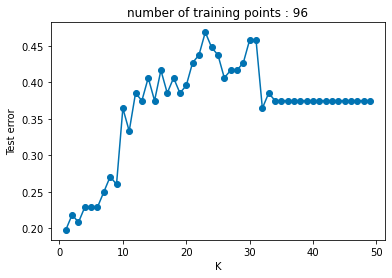

In [46]:
k = list(np.arange(1, 50))
error_list100 = tp.ErrorCurve(k)
error_list100.fit_curve(X_train100, y_train100, X_test100, y_test100)
error_list100.plot()
plt.show()

#### Affichage pour n = 200

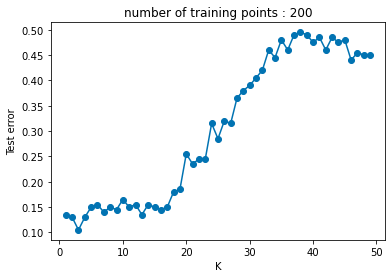

In [47]:
k = list(np.arange(1, 50))
error_list200 = tp.ErrorCurve(k)
error_list200.fit_curve(X_train200, y_train200, X_test200, y_test200)
error_list200.plot()
plt.show()

#### Affichage pour n = 500

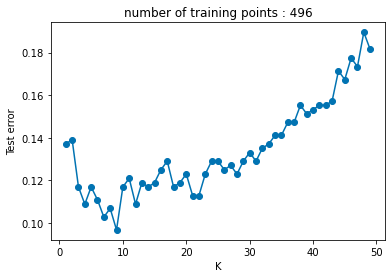

In [48]:
k = list(np.arange(1, 50))
error_list500 = tp.ErrorCurve(k)
error_list500.fit_curve(X_train500, y_train500, X_test500, y_test500)
error_list500.plot()
plt.show()

#### Affichage pour n = 1000

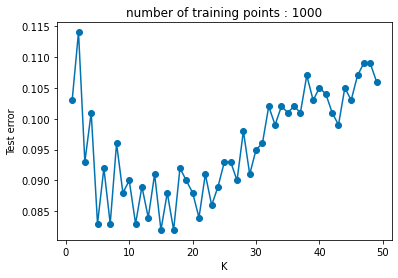

In [49]:
k = list(np.arange(1, 50))
error_list1000 = tp.ErrorCurve(k)
error_list1000.fit_curve(X_train1000, y_train1000, X_test1000, y_test1000)
error_list1000.plot()
plt.show()

La valeur du meilleur K diffère selon le dataset choisi. <br>
Pour un dataset plutôt petit (par exemple 100 ou 200) on obtient un K qui varie entre 2 et 5. <br>
Pour un dataset plutôt grand (par exemple 500 ou 1000), on obtient un K qui varie entre 8 et 12

#### Affichage de la frontière de décision

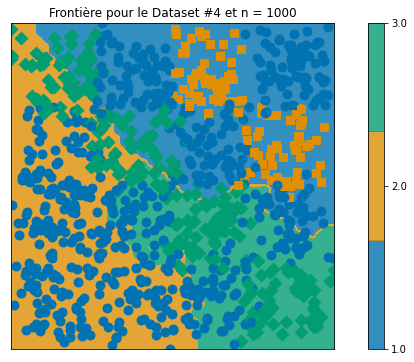

In [50]:
plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train1000, y_train1000)
plt.title("Frontière pour le Dataset #4 et n = 1000")
plt.show()

### 11) Avantages et inconvénients de la méthode des plus proches voisins

La méthode des plus proches voisins présente des avantages:
- Assez simple à comprendre et à implémenter
- C'est un modèle non paramétrique,donc pas besoin de faire d'assopmtions 
- Il s'adapte aux nouvelles données qu'il reçoit

Désavantages:
- Algorithme assez lent (temps de calcul long, par exemple dans la question précédente avec n = 1000)
- Il y a besoin de choisir un nombre K de voisins optimal, et pour cela on doit tester différentes valeurs (ou tracer une courbe) ce qui ajoute du temps de calcul
- Est sensible aux outliers

### 12) Etude de la base DIGITS de Scikit-Learn

#### Importation du dataset

In [51]:
from sklearn import datasets

digits = datasets.load_digits()

#### Visualisation des données dans Digits

In [52]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Le dataset Digits est une sorte de dictionnaire avec différentes clés et valeurs:

In [53]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [54]:
digits['data'].shape

(1797, 64)

Nous avons le champs 'data', qui donne 1797 matrices de taille 8x8 de valeurs représentant les images de chiffres, chaque valeur d'une matrice est donc un pixel d'une image. <br>

In [55]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [56]:
digits['target'].shape

(1797,)

Le champs 'target' qui est un array qui donne le label ou la classe pour chacune des 1797 images (allant de 0 à 9). <br>

In [57]:
digits['frame']

In [58]:
digits['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [59]:
len(digits['feature_names'])

64

Le champs feature_names donne une list de string, représentant le nom des features (donc le nom des différents pixels).

Ainsi, le dataset Digits contient des images de chiffres permettant de faire de la reconnaissance d'écriture. <br>

#### Affichage d'un exemple

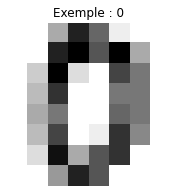

In [60]:
_, ax = plt.subplots(1, 1, figsize=(10,3))
ax.set_axis_off()
ax.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
ax.set_title("Exemple : {}".format(digits.target[0]))
plt.show()

#### Affichage histogramme des classes

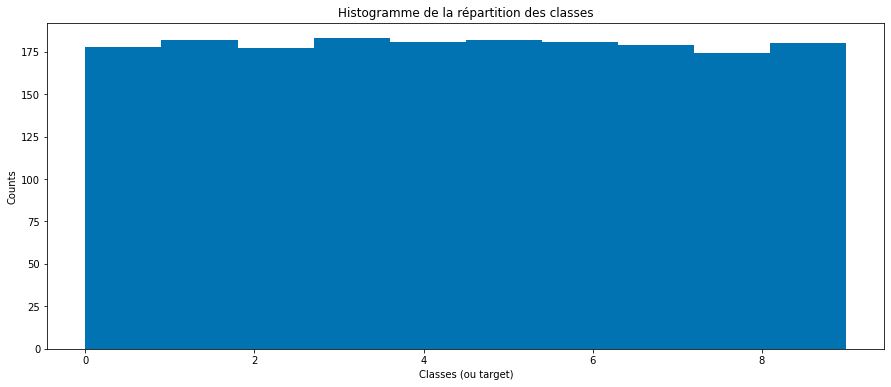

In [61]:
plt.figure(figsize=(15,6))
plt.hist(digits['target'])
plt.xlabel('Classes (ou target)')
plt.ylabel('Counts')
plt.title('Histogramme de la répartition des classes')
plt.show()

On remarque qu'il y a (à peu près le même nombre d'exemple pour chaque classe).

#### Constitution des train et test sets de même taille

In [62]:
X = digits['data']
y = digits['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)

In [64]:
digits['data'].shape

(1797, 64)

#### Application de la méthode KNN

In [65]:
knn_digits = KNeighborsClassifier(n_neighbors = 30)
knn_digits.fit(X_train, y_train)
y_pred = knn_digits.predict(X_test)
acc = accuracy(y_pred, y_test)

In [66]:
print("Le taux d'erreur pour k = 30 est de {}%".format((1 - acc)*100))

Le taux d'erreur pour k = 30 est de 5.6729699666295925%


### 13) Matrice de confusion associée au classifieur des digits

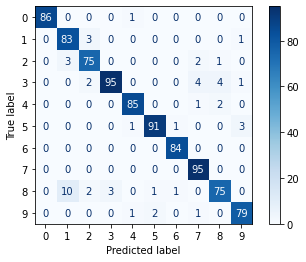

In [67]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn_digits, X_test, y_test, cmap=plt.cm.Blues, normalize=None)

La matrice de confusion permet de voir que le modèle sélectionné fait de bonnes prédictions: le taux de réussite varie entre 73% et 93%.

### 14) Méthode pour choisir k. Leave-One-Out Cross-Validation

Pour trouver k, on procède à une validation croisée avec la méthode "Leave-One-Out". Cela permet d'entraîner successivement le classifieur sur toutes les données en excluant une seule donnée à chaque fois. <br>
Bien que ce soit une façon très coûteuse en temps de calcul, cela permet de réduire significativement le biais de notre classifieur.

In [68]:
k = list(range(1, 47, 5))
k.append(100)
k.append(200)
k

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200]

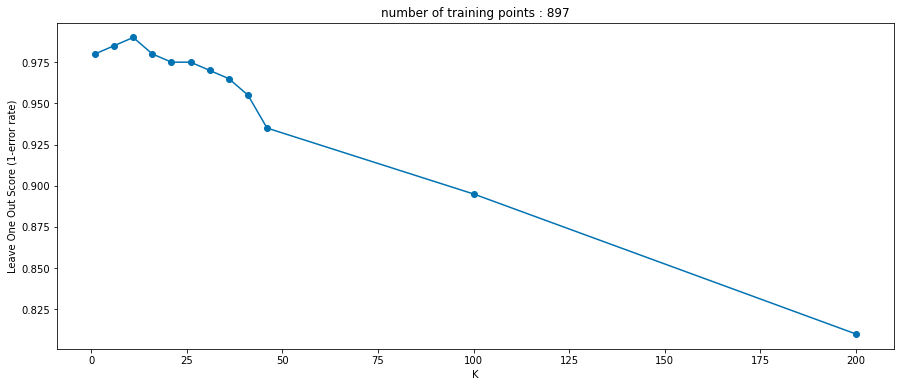

In [69]:
# LOO CV
plt.figure(figsize=(15,6))
curve_digits = tp.LOOCurve(k)
curve_digits.fit_curve(X_train, y_train)
curve_digits.plot()
plt.show()

Le meilleur nombre de plus proches voisins à choisir dans ce cas est k=1.

## Analyse Discriminante Linéaire

### 18) Classe LDA

In [70]:
class LDAClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Ici, on ne fait que stocker les variables d'entraînement
        self.X = X
        self.y = y
    
    def predict(self, X_test):
        self.X_test = X_test
        y_pred = list()
        
        # On récupère les X selon leurs classes (-1 ou 1)      
        X_plus = self.X[np.where(self.y == 1)]
        X_moins = self.X[np.where(self.y == -1)]
        
        m = len(X_plus)  # nombre d'exemples de classe 1
        n = len(self.X)  # nombre d'exemples au total
        
        # Calcul des mu+ et mu-
        mu_plus = np.zeros(2)
        mu_moins = np.zeros(2)

        for x_i in X_plus:
            mu_plus += x_i

        for x_i in X_moins:
            mu_moins += x_i
            
        mu_plus = (1/m) * mu_plus
        mu_moins = (1/(n-m)) * mu_moins
        
        # Calcul des covariances sigma+ et sigma-
        sigma_plus = np.zeros((2,2))
        sigma_moins = np.zeros((2,2))
        
        for j in range(len(X_plus)):
            sigma_plus += np.dot((X_plus[j] - mu_plus), np.transpose(X_plus[j] - mu_plus))
        sigma_plus = ((1 / (m-1)) * sigma_plus)
        
        for j in range(len(X_moins)):
            sigma_moins += np.dot((X_moins[j] - mu_moins), np.transpose(X_moins[j] - mu_moins))
        sigma_moins = ((1 / (n-m)) * sigma_moins)
        
        # Calcul de la covariance
        sigma = (1 / (n-2)) * ((m-1)*sigma_plus + (n-m-1)*sigma_moins)
        
        # On boucle sur toutes les données test et on applique la règle du classifieur
        for x in X_test:
            val1 = x.T @ np.linalg.pinv(sigma) @ (mu_plus - mu_moins).reshape(-1,1)
            val2 = (1/2) * mu_plus.T @ np.linalg.pinv(sigma) @ mu_plus - (1/2) * mu_moins.T @ np.linalg.pinv(sigma) @ mu_moins + np.log(1 - m/n) - np.log(m/n)
            if val1 > val2:
                y_pred.append(1)
            else:
                y_pred.append(-1)
        
        return y_pred

In [71]:
X_1, y_1 = tp.rand_bi_gauss(n1=1000, n2=1000, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9],
                  sigmas2=[0.9, 0.9])

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, train_size=0.8)

In [72]:
clf_lda = LDAClassifier()
clf_lda.fit(X_train, y_train)
y_pred_lda = clf_lda.predict(X_test)
y_pred_lda
acc_lda = accuracy(y_pred_lda, y_test)
print("Le taux d'erreur avec le LDA est de {}%".format((1-acc_lda)*100))

Le taux d'erreur avec le LDA est de 4.0000000000000036%


### 19) Comparaison des résultats avec Scikit-Learn

#### Création du dataset déséquilibré (rand_bi_gauss)

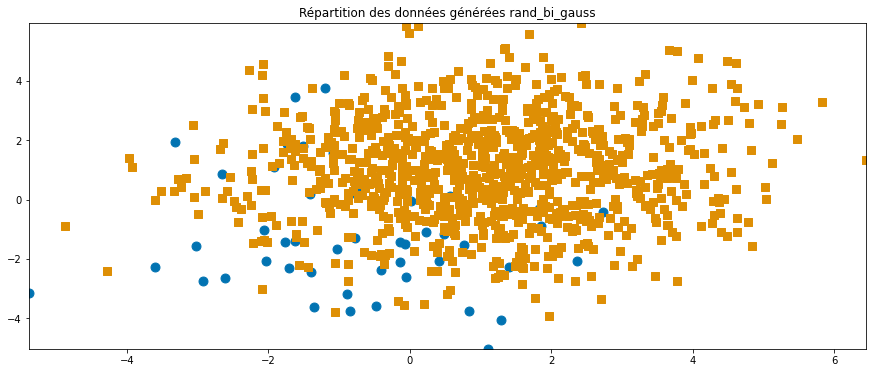

In [73]:
# Génération du dataset bi_gauss
X_lda, y_lda = tp.rand_bi_gauss(n1=1000, n2=50, mu1=[1, 1], mu2=[-1, -1], sigmas1=[1.7, 1.7],
                  sigmas2=[1.7, 1.7])
plt.figure(figsize=(15,6))
tp.plot_2d(X_lda, y_lda)
plt.title('Répartition des données générées rand_bi_gauss')
plt.show()

In [74]:
# Création des datasets d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_lda, train_size = 0.3)

#### LDA avec Scikit-Learn

In [75]:
clf_sk_lda = LinearDiscriminantAnalysis()

clf_sk_lda.fit(X_train, y_train)
y_pred_sk = clf_sk_lda.predict(X_test)

acc_sk_lda = accuracy(y_pred_sk, y_test)

print("Le taux d'erreur du LDA de Scikit-Learn est de {}%".format((1 - acc_sk_lda)*100))

Le taux d'erreur du LDA de Scikit-Learn est de 4.897959183673473%


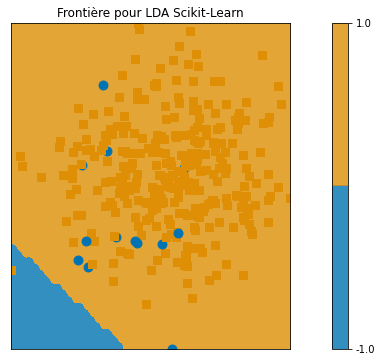

In [76]:
# Frontière de décision pour LDA Scikit-Learn
def f(X):
    return clf_sk_lda.predict(X.reshape(1,-1))

plt.figure(figsize = (15,6))
tp.frontiere_new(f, X_train, y_train)
plt.title("Frontière pour LDA Scikit-Learn")
plt.show()

#### LDA écrit 'from scratch'

In [77]:
clf_lda = LDAClassifier()

clf_lda.fit(X_train, y_train)
y_pred_lda = clf_lda.predict(X_test)

acc_lda = accuracy(y_pred_lda, y_test)

print("Le taux d'erreur du LDA 'from scratch' est de {}%".format((1 - acc_lda)*100))

Le taux d'erreur du LDA 'from scratch' est de 5.034013605442178%


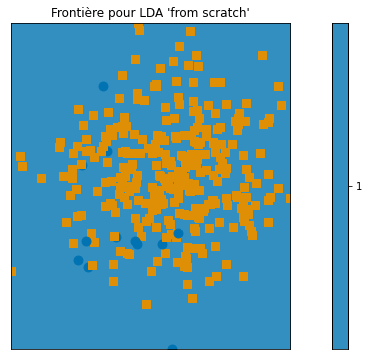

In [78]:
# Frontière de décision pour LDA 'from scratch'
def f(X):
    return clf_lda.predict(X.reshape(1,-1))

plt.figure(figsize = (15,6))
tp.frontiere_new(f, X_train, y_train)
plt.title("Frontière pour LDA 'from scratch'")
plt.show()

### 20) Règle de classification du LDA 'from scratch' avec dataset #1 et #3

#### Dataset 1

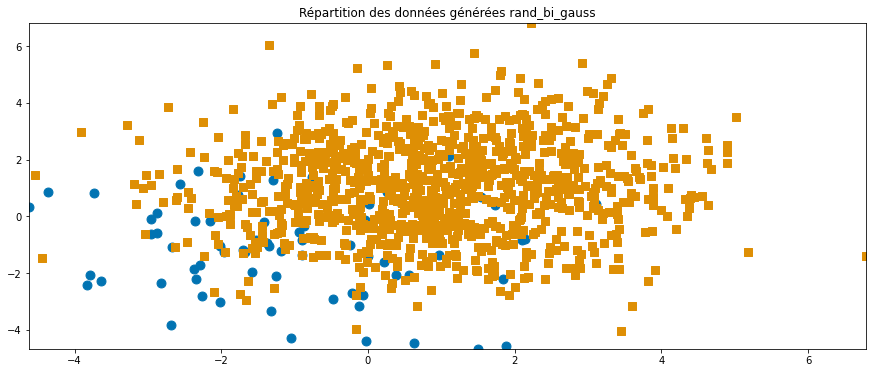

In [80]:
# Génération du dataset bi_gauss
X_1, y_1 = tp.rand_bi_gauss(n1=1000, n2=70, mu1=[1, 1], mu2=[-1, -1], sigmas1=[1.7, 1.7],
                  sigmas2=[1.7, 1.7])

plt.figure(figsize=(15,6))
tp.plot_2d(X_1, y_1)
plt.title('Répartition des données générées rand_bi_gauss')
plt.show()

In [81]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, train_size=0.3)

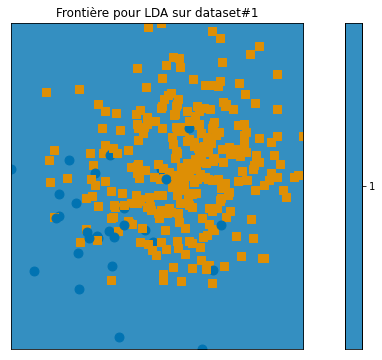

Le taux d'erreur du LDA 'from scratch' est de 5.473965287049398%


In [82]:
# Frontière de décision
clf_lda = LDAClassifier()

clf_lda.fit(X_train1, y_train1)
y_pred_lda = clf_lda.predict(X_test1)

acc_lda = accuracy(y_pred_lda, y_test1)

def f(X):
    return clf_lda.predict(X.reshape(1,-1))

plt.figure(figsize = (15,6))
tp.frontiere_new(f, X_train1, y_train1)
plt.title("Frontière pour LDA sur dataset#1")
plt.show()

print("Le taux d'erreur du LDA 'from scratch' est de {}%".format((1 - acc_lda)*100))

#### Dataset 3

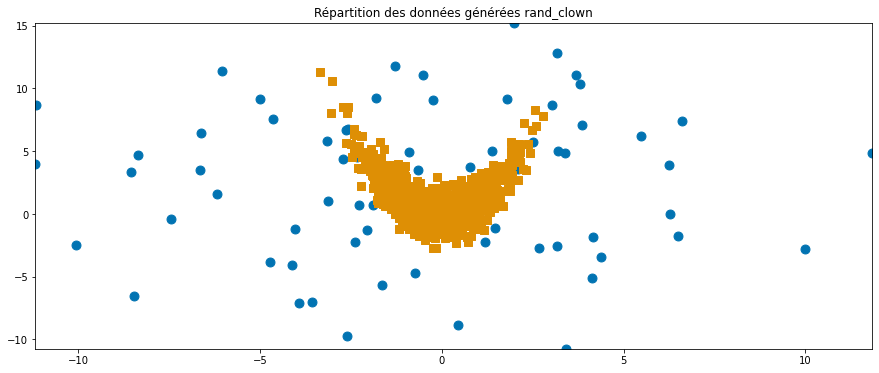

In [83]:
# Génération du dataset clown
X_3, y_3 = tp.rand_clown(n1=1000, n2=70, sigma1 = 1, sigma2 = 5)

plt.figure(figsize=(15,6))
tp.plot_2d(X_3, y_3)
plt.title('Répartition des données générées rand_clown')
plt.show()

In [84]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, train_size=0.3)

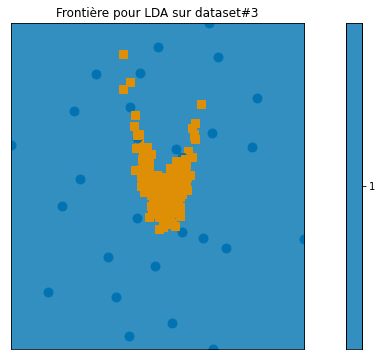

Le taux d'erreur du LDA 'from scratch' est de 5.473965287049398%


In [85]:
# Frontière de décision
clf_lda3 = LDAClassifier()

clf_lda3.fit(X_train3, y_train3)
y_pred_lda = clf_lda3.predict(X_test3)

acc_lda = accuracy(y_pred_lda, y_test3)

def f(X):
    return clf_lda3.predict(X.reshape(1,-1))

plt.figure(figsize = (15,6))
tp.frontiere_new(f, X_train3, y_train3)
plt.title("Frontière pour LDA sur dataset#3")
plt.show()

print("Le taux d'erreur du LDA 'from scratch' est de {}%".format((1 - acc_lda)*100))

#### Commentaires :

Le classification est plus réussie dans le cas du dataset 1 que dans le dataset 3. En effet, la frontière de décision est plus pertinente dans le premier cas, car dans le dataset 3, il y a un cluster de classe 1 au milieu des données de classe -1. <br>
Dans ce cas, il serait préférable d'utiliser un KNN, par exemple, pour mieux classifier les données. <br>
En revanche, dans le cas du dataset 1, le LDA est une bonne solution car on peut tracer une droite pour faire la séparation des deux classes.

## Régression Logistique

### 21) Application régression logistique sur les données rand_bi_gauss

#### Cas classes équilibrées

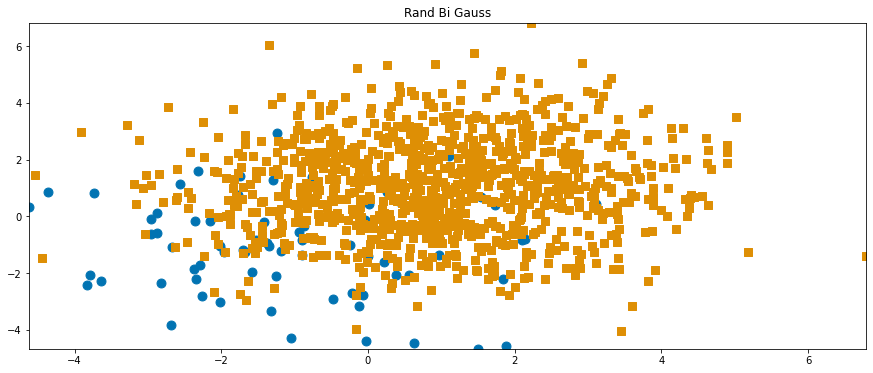

In [86]:
plt.figure(figsize=(15,6))
tp.plot_2d(X_1, y_1)
plt.title("Rand Bi Gauss")
plt.show()

In [87]:
from sklearn import linear_model as lm

X_1, y_1 = tp.rand_bi_gauss(n1=500, n2=500, mu1=[1, 1], mu2=[-1, -1], sigmas1=[1.7, 1.7],
                  sigmas2=[1.7, 1.7])

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, train_size=0.8)
clf_log = lm.LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)

acc_log = accuracy(y_pred_log, y_test)

print("Le taux d'erreur pour la régression logistique est de {}%".format((1 - acc_log) * 100))

Le taux d'erreur pour la régression logistique est de 20.499999999999996%


#### Cas classes déséquilibrées

In [88]:
# Génération du dataset bi_gauss
X_d, y_d = tp.rand_bi_gauss(n1=1000, n2=70, mu1=[1, 1], mu2=[-1, -1], sigmas1=[1.7, 1.7],
                  sigmas2=[1.7, 1.7])

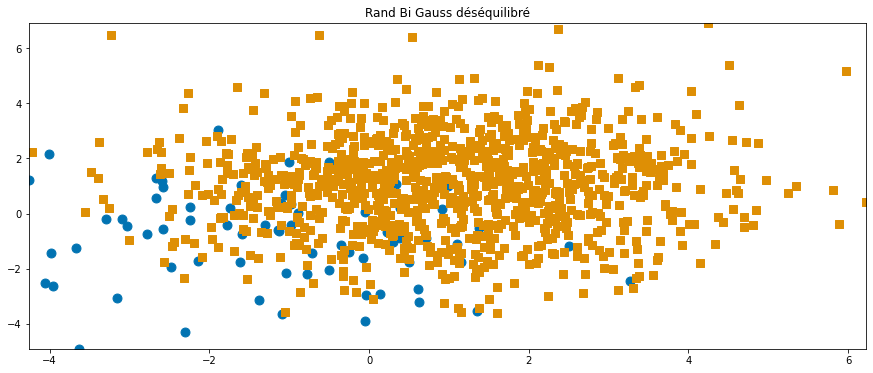

In [89]:
plt.figure(figsize=(15,6))
tp.plot_2d(X_d, y_d)
plt.title("Rand Bi Gauss déséquilibré")
plt.show()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, train_size=0.8)
clf_log_d = lm.LogisticRegression()
clf_log_d.fit(X_train, y_train)
y_pred_log = clf_log_d.predict(X_test)

acc_log = accuracy(y_pred_log, y_test)

print("Le taux d'erreur pour la régression logistique est de {}%".format((1 - acc_log) * 100))

Le taux d'erreur pour la régression logistique est de 5.607476635514019%


On remarque que dans la cas déséquilibré, le taux d'erreur est beaucoup plus grand que le cas équilibré (même nombre d'exemples dans chaque classe). <br>
Cela se rapproche plus de la réalité.

### 22) Coef_ et intercept_

In [91]:
print("Coefficients des features :", clf_log.coef_)
print("Intercepts des features :", clf_log.intercept_)

Coefficients des features : [[0.6229651  0.69116087]]
Intercepts des features : [-0.0113975]


L'attribut "coef_" correspond aux coefficients des features explicatives du modèle de régression logistique. <br>
L'attribut "intercept_" correspond aux coefficients de biais ajoutés pour la décision.

### 23) Frontières de décision

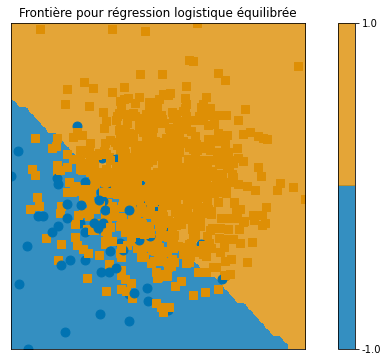

In [92]:
# Fonction pour frontiere_new
def f(X):
    return clf_log.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train, y_train)
plt.title("Frontière pour régression logistique équilibrée")
plt.show()

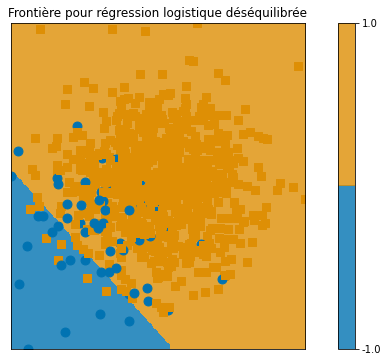

In [93]:
# Fonction pour frontiere_new
def f(X):
    return clf_log_d.predict(X.reshape(1,-1))

plt.figure(figsize = (12,6))
tp.frontiere_new(f, X_train, y_train)
plt.title("Frontière pour régression logistique déséquilibrée")
plt.show()

### 24) Classification régression logistique pour dataset DIGITS

In [94]:
X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)

In [95]:
clf_log_digits = lm.LogisticRegression()
clf_log_digits.fit(X_train, y_train)
y_pred_dig = clf_log_digits.predict(X_test)

acc_dig = accuracy(y_pred_dig, y_test)

print("Le taux d'erreur de la régression logistique sur le dataset DIGITS est de {}%".format((1 - acc_dig) *100))

Le taux d'erreur de la régression logistique sur le dataset DIGITS est de 4.115684093437155%


C:\Users\Davide\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
